In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)

In [3]:
data = load_breast_cancer(as_frame=True)
X,y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [7]:
print("Accuracy score: ", f"{accuracy_score(y_test,y_pred):.4f}")
print("\nClassification report: \n", f"{classification_report(y_test,y_pred, target_names=data.target_names)}")

Accuracy score:  0.9240

Classification report: 
               precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



<Axes: >

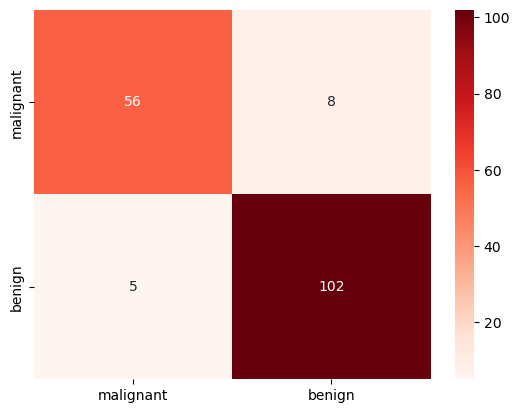

In [9]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Reds',fmt='d',
            xticklabels=data.target_names, yticklabels=data.target_names)

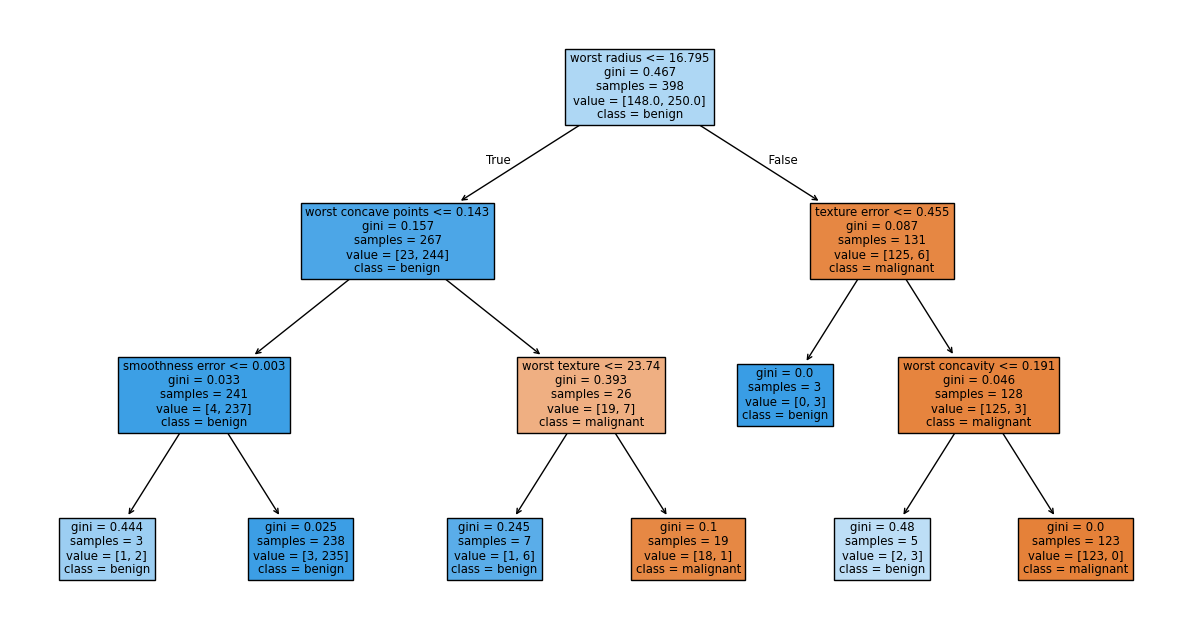

In [12]:
plt.figure(figsize=(15,8))
plot_tree(model,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True)
plt.show()

In [13]:
new_sample = X_test.iloc[[0]]
prediction_name = data.target_names[model.predict(new_sample)]

print("--- New Sample Classification ---")
print(f"Features: {new_sample.values[0][:4]}... Truncated")
print(f"predicted class: {prediction_name}")

--- New Sample Classification ---
Features: [ 13.73  22.61  93.6  578.3 ]... Truncated
predicted class: ['malignant']
